In [3]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')



In [10]:
from src.data_analysis.analysis_helpers import get_run_ids
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

runs = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs"],[True, True, True, True, True, True],["centroids", "margin", "kmeans", 1000, 0.001, 10])
print(len(runs))
# for row, data in runs.iterrows():
#     if data["status"] == "RUNNING":
#         continue
#     run_id = data["run_id"]
# run_ids = runs.run_id
run_ids = get_run_ids(runs)

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


10


In [11]:
all_accs = []
for run_id in run_ids:
    all_accs.append(np.array([m.value for m in tracking.get_metric_history(run_id, "acc")]))
    samples_labeled = np.array([m.value for m in tracking.get_metric_history(run_id, "samples_labeled")])

all_accs = np.array(all_accs)

avg_accs = np.mean(all_accs, axis=0)
std_accs = np.std(all_accs, axis=0)
lower_bound = avg_accs - std_accs
upper_bound = avg_accs + std_accs

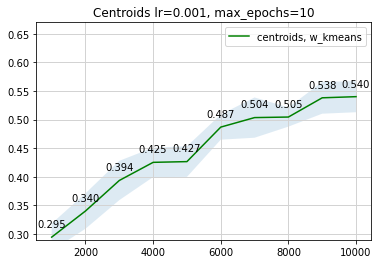

In [13]:
# plot
plt.plot(samples_labeled, avg_accs,color='green', label='centroids, w_kmeans')
plt.fill_between(samples_labeled, lower_bound, upper_bound, alpha=0.15)
plt.legend()
plt.title(f"Centroids lr=0.001, max_epochs=10")
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.67])

for x,y in zip(samples_labeled,avg_accs):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.show()